## Question 4

In [53]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"TABLE_III._Deaths_in_122_U.S._cities.csv", header=0)
display(df.describe())

,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Location 2
count,5148.0,5148.000000,4830.000000,4824.000000,4778.000000,4358.000000,3301.000000,3005.000000,4299.000000,0.0
mean,2016.0,20.000000,279.840373,187.677861,65.104018,19.521340,8.449258,7.186023,19.817865,NaN
std,0.0,11.255722,1080.741649,725.465670,249.953888,71.385536,26.659848,21.626929,73.040133,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,2016.0,10.000000,39.000000,27.000000,8.000000,2.000000,1.000000,1.000000,3.000000,NaN
50%,2016.0,20.000000,77.000000,52.000000,18.000000,5.000000,3.000000,2.000000,6.000000,NaN
75%,2016.0,30.000000,154.000000,102.000000,37.000000,12.000000,5.000000,5.000000,12.000000,NaN
max,2016.0,39.000000,12883.000000,8816.000000,2963.000000,880.000000,276.000000,226.000000,936.000000,NaN


In [3]:
# preprocess data
df = df[df['All causes, by age (years), All Ages**, flag'].isna()]
df = df[[col for col in df.columns if 'flag' != col[-4:]]]
regions_df = df.loc[:8,:]
data_df = df.loc[10:,:]
total = df.loc[9,:]
display(regions_df)
display(total)

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Location 1,Location 2
0,New England,2016,1,600.0,426.0,125.0,28.0,12.0,9.0,47.0,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,563.0,181.0,32.0,13.0,18.0,32.0,NaN,NaN
2,E.N. Central,2016,1,2468.0,1611.0,594.0,167.0,62.0,34.0,159.0,NaN,NaN
3,W.N. Central,2016,1,634.0,432.0,150.0,31.0,9.0,11.0,37.0,NaN,NaN
4,S. Atlantic,2016,1,1402.0,893.0,343.0,92.0,32.0,41.0,88.0,NaN,NaN
5,E.S. Central,2016,1,1230.0,790.0,296.0,97.0,22.0,25.0,76.0,NaN,NaN
6,W.S. Central,2016,1,2167.0,1408.0,542.0,148.0,40.0,29.0,124.0,NaN,NaN
7,Mountain,2016,1,1460.0,997.0,316.0,103.0,26.0,18.0,95.0,NaN,NaN
8,Pacific,2016,1,2021.0,1480.0,401.0,99.0,26.0,15.0,156.0,NaN,NaN


Reporting Area                            Total
MMWR YEAR                                  2016
MMWR WEEK                                     1
All causes, by age (years), All Ages**    12789
All causes, by age (years), >=65           8600
All causes, by age (years), 45-64          2948
All causes, by age (years), 25-44           797
All causes, by age (years), 1-24            242
All causes, by age (years), LT 1            200
P&I Total                                   814
Location 1                                  NaN
Location 2                                  NaN
Name: 9, dtype: object

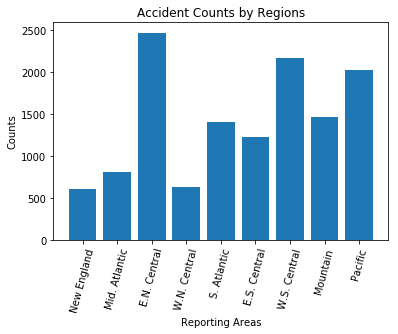

In [4]:
plt.title("Accident Counts by Regions")
plt.bar(range(len(regions_df)), list(regions_df['All causes, by age (years), All Ages**']))
plt.xticks(range(len(regions_df)),list(col for col in regions_df['Reporting Area']), rotation=75)
plt.xlabel('Reporting Areas')
plt.ylabel('Counts')
plt.show()

It seems E.N Central, W.S.Central and Pacific have higher count of accidents in the year 2016

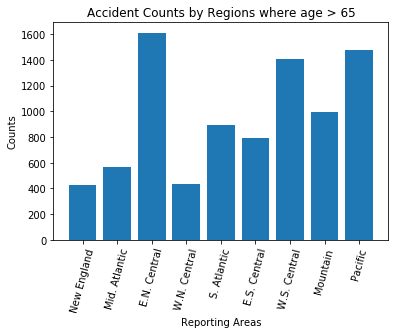

In [6]:
plt.title("Accident Counts by Regions where age > 65")
plt.bar(range(len(regions_df)), list(regions_df['All causes, by age (years), >=65']))
plt.xticks(range(len(regions_df)),list(col for col in regions_df['Reporting Area']), rotation=75)
plt.xlabel('Reporting Areas')
plt.ylabel('Counts')
plt.show()

### Analysis from excel
It seems that there are 39 different versions of data for each of the 122 cities because the cumulative regional sums for accident counts and each of the 39 different sums by week MMWR_WEEK is around 9000 - 12000.

P&I_total is not being calculated for the accidents and more description of this feature is need for further analysis.

In few cases the sum of accidents of all ages are not added cumulatively into the "All causes, by age (years), All Ages**"

## Question 5 a

In [7]:
events_df = pd.read_csv('timeseries_events.csv')
users_df = pd.read_csv('timeseries_users.csv')

In [8]:
display(events_df.head())

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00


In [9]:
display(users_df.head())

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [24]:
events_grouped = events_df.groupby(['user_id']).count()
events_grouped.columns = ['events_count']
user_events_df = users_df.join(events_grouped, on='user_id')
display(user_events_df.head())

,age,gender,user_id,events_count
0,51,f,0,148.0
1,49,f,1,509.0
2,35,m,2,126.0
3,63,m,3,65.0
4,27,f,4,247.0


## To be implemented

In [25]:
male_above_30 = user_events_df[(user_events_df.gender == 'm') & (user_events_df.age > 30)]
def lag_fun(x):
    lag_list = []
    for i in range(len(x)):
        if i != 0:
            lag_list.append(((datetime.datetime(x[i]) - datetime.fromtimestamp(x[i-1])).days))
    return list(x)
events_df.groupby(['user_id']).agg(lag_fun)
display(male_above_30)

,age,gender,user_id,events_count
2,35,m,2,126.0
3,63,m,3,65.0
12,45,m,12,1705.0
17,51,m,17,147.0
21,41,m,21,254.0
23,56,m,23,129.0
31,42,m,31,271.0
33,52,m,33,51.0
38,34,m,38,391.0
40,41,m,40,10.0


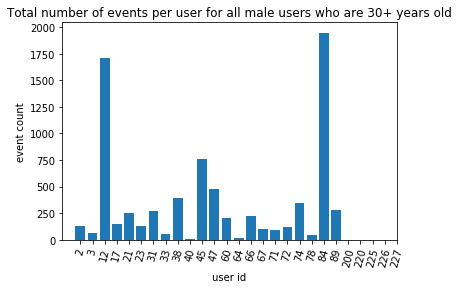

In [29]:
plt.title("Total number of events per user for all male users who are 30+ years old")
plt.bar(range(len(male_above_30)), list(male_above_30['events_count']))
plt.xticks(range(len(male_above_30)),list(col for col in male_above_30['user_id']), rotation=75)
plt.xlabel('user id')
plt.ylabel('event count')
plt.show()

## Question 5 b

In [32]:
events_df = events_df.sort_values(['user_id', 'event_date'])
events_lag_list = events_df.groupby(['user_id']).

,user_id,event_date
38,0,2015-01-15 00:00:00
144,0,2015-01-15 00:00:00
72,0,2015-01-16 00:00:00
129,0,2015-01-16 00:00:00
6,0,2015-01-17 00:00:00
10,0,2015-01-17 00:00:00
86,0,2015-01-17 00:00:00
31,0,2015-01-18 00:00:00
138,0,2015-01-18 00:00:00
69,0,2015-01-19 00:00:00


AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [55]:
datetime.strptime('2015-04-01 00:00:00', '%b %d %Y %I')

datetime.datetime(2005, 6, 1, 13, 33)